# COVID-19 Time Series CSV Analysis MN

In [20]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

import urllib.request

#See:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#Download the latest CSV file
urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv','Documents/time_series_19-covid-Confirmed.csv')

('Documents/time_series_19-covid-Confirmed.csv',
 <http.client.HTTPMessage at 0x1d462626f88>)

In [21]:
time_series_file = "Documents/time_series_19-covid-Confirmed.csv"
df = pd.read_csv(time_series_file)
print(df.head())

  Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        2        3        5   
1            NaN          Japan  36.0000  138.0000        2        1        2   
2            NaN      Singapore   1.2833  103.8333        0        1        3   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        7        8        8  ...       82      114      147      177   
1        2        4        4  ...      773      839      825      878   
2        3        4        5  ...      212      226      243      266   
3        1        1        1  ...        1        1        1        1   
4        3        4        4  ...      238      428      566      673   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0      212      

In [22]:
df.set_index(['Province/State', 'Country/Region'])

Lat      Long  1/22/20  1/23/20  \
Province/State Country/Region                                               
NaN            Thailand               15.0000  101.0000        2        3   
               Japan                  36.0000  138.0000        2        1   
               Singapore               1.2833  103.8333        0        1   
               Nepal                  28.1667   84.2500        0        0   
               Malaysia                2.5000  112.5000        0        0   
...                                       ...       ...      ...      ...   
               Jersey                 49.1900   -2.1100        0        0   
               Puerto Rico            18.2000  -66.5000        0        0   
               Republic of the Congo  -1.4400   15.5560        0        0   
               The Bahamas            24.2500  -76.0000        0        0   
               The Gambia             13.4667  -16.6000        0        0   

                                      1/24/20  1/25/20  1/26/20  1/27/20  \
Province/State Country/Region                                              
NaN            Thailand                     5        7        8        8   
               Japan                        2        2        4        4   
               Singapore                    3        3        4        5   
               Nepal                        0        1        1        1   
               Malaysia                     0        3        4        4   
...                                       ...      ...      ...      ...   
               Jersey                       0        0        0        0   
               Puerto Rico                  0        0        0        0   
               Republic of the Congo        0        0        0        0   
               The Bahamas                  0        0        0        0   
               The Gambia                   0        0        0        0   

                                      1/28/20  1/29/20  ...  3/14/20  3/15/20  \
Province/State Country/Region                           ...                     
NaN            Thailand                    14       14  ...       82      114   
               Japan                        7        7  ...      773      839   
               Singapore                    7        7  ...      212      226   
               Nepal                        1        1  ...        1        1   
               Malaysia                     4        7  ...      238      428   
...                                       ...      ...  ...      ...      ...   
               Jersey                       0        0  ...        0        0   
               Puerto Rico                  0        0  ...        0        0   
               Republic of the Congo        0        0  ...        0        0   
               The Bahamas                  0        0  ...        0        0   
               The Gambia                   0        0  ...        0        0   

                                      3/16/20  3/17/20  3/18/20  3/19/20  \
Province/State Country/Region                                              
NaN            Thailand                   147      177      212      272   
               Japan                      825      878      889      924   
               Singapore                  243      266      313      345   
               Nepal                        1        1        1        1   
               Malaysia                   566      673      790      900   
...                                       ...      ...      ...      ...   
               Jersey                       0        0        0        0   
               Puerto Rico                  0        0        0        0   
               Republic of the Congo        0        0        0        0   
               The Bahamas                  0        0        0        0   
               The Gambia                   0        0        0        0   

        

In [23]:
#Read the dates from the headers
headers = list(df.columns.values)
del headers[0:43]
print(headers)

['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20']


In [24]:
df.loc[df['Province/State'] == 'Minnesota']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
124,Minnesota,US,45.6945,-93.9002,0,0,0,0,0,0,...,21,35,54,60,77,89,115,138,169,169.0


In [25]:
rownum = df.loc[df['Province/State'] == 'Minnesota'].index[0]
print(rownum)

124


In [26]:
#dates = ['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20']
#cases = df.loc[124, '3/1/20':'3/22/20']
dates = headers
cases = df.loc[rownum, dates[0]:dates[-1]]
state = df.loc[rownum, 'Province/State':'Country/Region']

print(state,dates,cases)


Province/State    Minnesota
Country/Region           US
Name: 124, dtype: object ['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'] 3/1/20       0
3/2/20       0
3/3/20       0
3/4/20       0
3/5/20       0
3/6/20       0
3/7/20       0
3/8/20       0
3/9/20       0
3/10/20      3
3/11/20      5
3/12/20      9
3/13/20     14
3/14/20     21
3/15/20     35
3/16/20     54
3/17/20     60
3/18/20     77
3/19/20     89
3/20/20    115
3/21/20    138
3/22/20    169
3/23/20    169
Name: 124, dtype: object


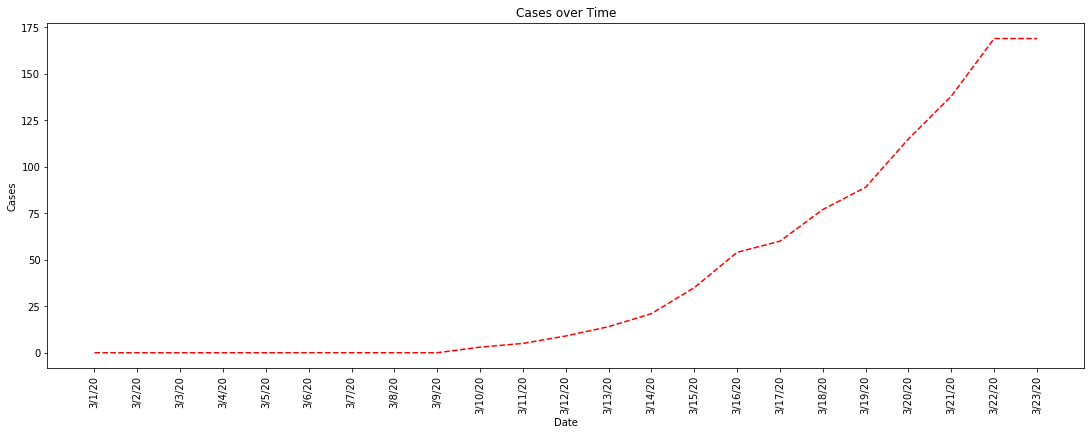

In [27]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0,0,0.8,0.8])

axes.plot(dates, cases, 'r--') # Create line plot with red dashed line
plt.title('Cases over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

In [28]:
datetimes = [pd.to_datetime(date, infer_datetime_format=True).dayofyear for date in dates]
print(datetimes)

[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [29]:
x = np.array(datetimes)
y = np.array(cases)
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

#print(x,y)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_trainp, x_testp, y_trainp, y_testp = train_test_split(x, y, test_size=0.2, random_state=0)

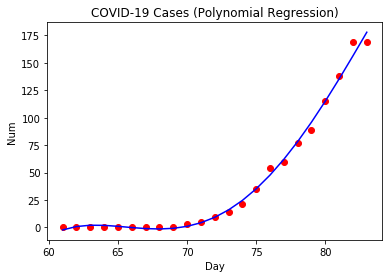

In [31]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('COVID-19 Cases (Polynomial Regression)')
    plt.xlabel('Day')
    plt.ylabel('Num')
    plt.show()
    return
viz_polymonial()

In [32]:
# March 30th Polymonial Regression Prediction (210K)
march_30 = pd.to_datetime('03/30/2020', infer_datetime_format=True).dayofyear
prediction_march_30 = pol_reg.predict(poly_reg.fit_transform([[march_30]]))
print("Prediction March 30th:", march_30, prediction_march_30)

Prediction March 30th: 90 [[299.69420267]]


In [33]:
# April 27th Polymonial Regression Prediction (5.6M)
april_27 = pd.to_datetime('04/27/2020', infer_datetime_format=True).dayofyear
prediction_april_27 = pol_reg.predict(poly_reg.fit_transform([[april_27]]))
print("Prediction April 27th:", prediction_april_27)

Prediction April 27th: [[-5362.40009602]]


In [34]:
# May 29th Polymonial Regression Prediction (41M)
jun_01 = pd.to_datetime('06/01/2020', infer_datetime_format=True).dayofyear
prediction_jun_01 = pol_reg.predict(poly_reg.fit_transform([[jun_01]]))
print("Prediction June 1st (90 days):", prediction_jun_01)

Prediction June 1st (90 days): [[-74120.95064694]]


In [35]:
#Add more days and predictions per day to the arrays and plot display
casesfuture = cases.values
datetimesfuture = datetimes[:]
  

for dayofyear in range(datetimes[-1] + 1, datetimes[-1] + 90):
    datetimesfuture.append(dayofyear)
    numpredict = pol_reg.predict(poly_reg.fit_transform([[dayofyear]])).item(0,0)
    if numpredict < 0:
        numpredict = 0.0
    casesfuture = np.append(casesfuture, numpredict)   

print(datetimesfuture, casesfuture)


[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172] [0 0 0 0 0 0 0 0 0 3 5 9 14 21 35 54 60 77 89 115 138 169 169.0
 199.46951038944826 220.57290076139907 240.72347268469457
 259.3540789687686 275.84687712929735 289.533329388345 299.69420267450914
 305.5595686221932 306.30880357256683 301.07058857263473 288.9229093759641
 268.8930564423936 239.95762493788789 201.04251473482873 151.0229304118111
 88.72338125373062 12.917681251870818 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0

In [36]:
xf = np.array(datetimesfuture)
yf = np.array(casesfuture)
xf=xf.reshape(len(xf),1)
yf=yf.reshape(len(yf),1)

#print(xf,yf)

In [37]:
# Splitting the dataset into the Training set and Test set
xf_trainp, xf_testp, yf_trainp, yf_testp = train_test_split(xf, yf, test_size=0.2, random_state=0)

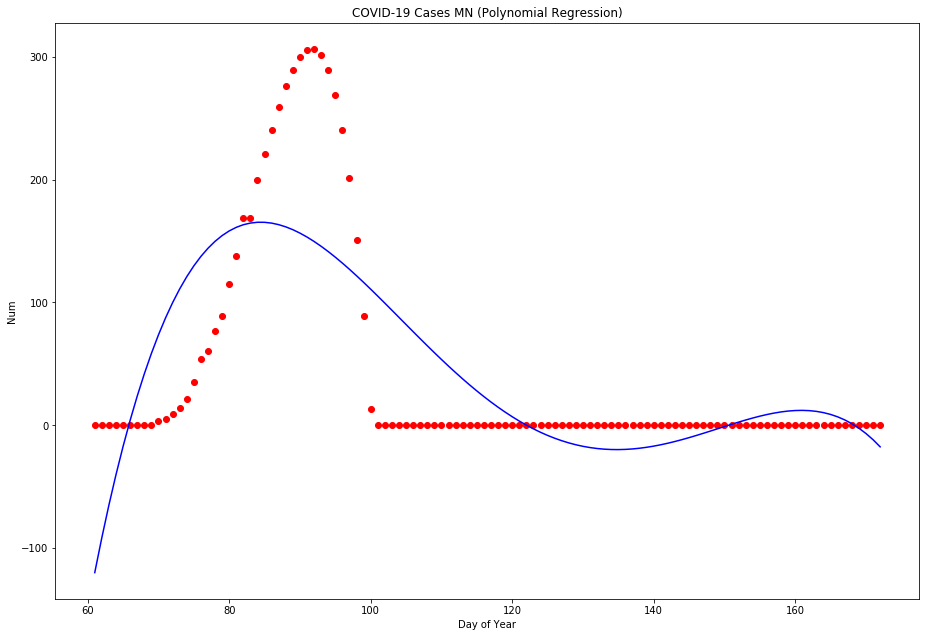

In [38]:
# Fitting Polynomial Regression to the dataset
poly_regf = PolynomialFeatures(degree=4)
x_polyf = poly_regf.fit_transform(xf)
pol_regf = LinearRegression()
pol_regf.fit(x_polyf, yf)

# Visualizing the Polymonial Regression results
def vizf_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(xf, yf, color='red')
    axes.plot(xf, pol_regf.predict(poly_regf.fit_transform(xf)), color='blue')
    axes.ticklabel_format(useOffset=False, style='plain')
    plt.title('COVID-19 Cases MN (Polynomial Regression)')
    plt.xlabel('Day of Year')
    plt.ylabel('Num')
    plt.show()
    return
vizf_polymonial()